# Computational Intelligence

# Lab: Genetic Algorithm (GA)

## Outline

1. GA basics:
  - Function
  - Binary representation
  - Fitness evaluation
2. Developing classes for GA
  - `ParameterSet` class
  - `Function` class
  - `Individual` class
  - `Population` class
  - `Evaluator` class
  - `Selection` class
  - `Crossover` class
  - `Mutation` class
  - `Breeder` class
  - `GA` class
3. Plotting graphs
  - Modifying the `Function` class
  - Modifying the `Evaluator` class
  - Modifying the `Population` class
  - Modifying the `GA` class

# 1. GA basics
- This section mainly focuses on how GA encodes values as a binary string

## Function of one variable

- maximize $f(x) = 15x - x^2$
- subject to $0 \leq x \leq 15$

Text(0, 0.5, 'y = f(x)')

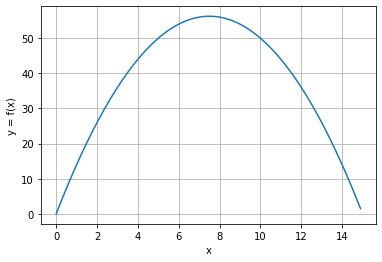

In [37]:
# Create a function
S = [0, 15]           # Search domain (search space)
def f(x):
    return 15 * x - x * x

# Evaluate and plot the function
import numpy as np
import matplotlib.pyplot as plt
step = 0.1
x = np.arange(S[0], S[1], step)
y = f(x)
plt.plot(x, y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y = f(x)")

## Binary representation
- Simple GA adopts a binary representation.
- That is, a sequence of 0s and 1s
- Convert a representation to variable

In [2]:
length = 8
genes = np.random.randint(2, size=length)   # Randomly generate 0s and 1s
print(genes)

[0 1 0 0 0 0 0 0]


### Binary to decimal conversion
- In Python, each bit can be converted to a string, then concatenate them together to produce a string of 0s and 1s.
- Once, the string is obtained, just invoke 'eval()' to convert into a numerical value.
- $dec = \sum_{n=0}^{N-1}b_n \times 2^n$
 - $b_0$ denotes the right-most bit, $b_1$ the second right-most bit, and so on.
 - $b_{N-1}$ denotes the left-most bit, where $N$ is the legnth of the binary sequence.

In [3]:
def bin_to_dec(bin):
    seq = "0b" + "".join([str(i) for i in bin])
    return eval(seq)

dec = bin_to_dec(genes)
print("Decimal value =", dec)

Decimal value = 64


### Binary to decimal conversion (con't)
- However, the decimal value obtained previously is an integer in the interval $[0, 2^N - 1]$.
- Need to shift and scale it into a floating-point value in a desired interval $[a,b]$.
- $dec = a + \frac{\sum_{n=0}^{N-1}b_n \times 2^n}{2^N-1}\times(b-a)$

In [4]:
# Modify bin_to_dec() function
def bin_to_dec(bin, interval):
    seq = "0b" + "".join([str(i) for i in bin])
    return interval[0] + eval(seq) * (interval[1] - interval[0]) / (2 ** len(bin) - 1)

dec = bin_to_dec(genes, S)
print("Decimal value =", dec)

Decimal value = 3.764705882352941


## Fitness evaluation
- For function optimization problems, the function to be optimized is usually used as a fitness function.
- Therefore, fitness evalution equals an execution of the function with the values represented by an individual.

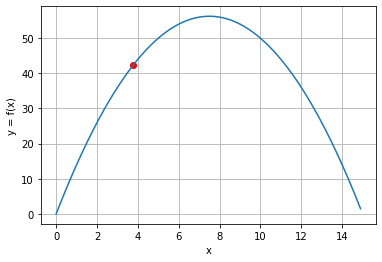

In [5]:
def fitness_eval(val, f, is_maximize=True):
    if is_maximize is True:
        return f(val)       # Maximization problem
    else:
        return -f(val)      # Minimization problem
    
fit = fitness_eval(dec, f)

# Plot a graph
plt.plot(x, y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.scatter(dec, fit, color='red')

## Function of two variables (or more)

### Sphere function
- minimize $f(x_0, x_1) = x_0^2 + x_1^2$
- subject to $-5 \leq x_0 \leq 5$ and $-5 \leq x_1 \leq 5$

### Ackley function
- minimize $f(x_0, x_1) = -20 e^{-0.2 \sqrt{0.5(x_0^2 + x_1^2)}} - e^{0.5(cos 2\pi x_0 + cos 2 \pi x_1)} + e + 20$
- subject to $-5 \leq x_0 \leq 5$ and $-5 \leq x_1 \leq 5$

In [6]:
# Define functions
def sphere(x):
    return x[0] * x[0] + x[1] * x[1]

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1]))) \
           - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20 

Text(0.5, 0, 'x[1]')

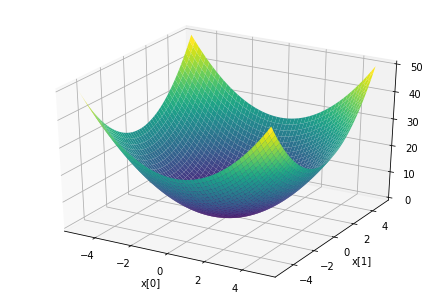

In [7]:
f = sphere

# Create a list of x0 values
# Create a list of x1 values
step = 0.01
x0 = np.arange(-5, 5, step)
x1 = np.arange(-5, 5, step)

# Create a grid of x0 and x1 using 'np.meshgrid'
x0, x1 = np.meshgrid(x0, x1)

# Evaluate a function f(x0,x1)
y = f([x0, x1])

# Plot the function using 'plt.plot_surface'
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)

# Formatting the plot
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")     

## Binary representation for two variables (or more)
- The gene is divided into parts, each encodes one variable.
- Need to know the number of bits required to encode each variable

In [8]:
search_domain = [[-5, 5], [-5, 5]]         # Search domain of each variable
num_bits = [4, 4]                          # Number of bits for each variable
length = np.sum(num_bits)                  # Total length
genes = np.random.randint(2, size=length)  # Randomly create a bit string

print(genes)

[0 0 0 0 0 0 0 1]


## A `decode` function

In [9]:
def decode(bin, num_bits, interval):
    """Decode a binary string into variables
    
    Args:
        bin (np.array): An input binary string
        num_bits (list): The number of bits required by each variable
        interval (list): The domain of each variable
        
    Returns:
        x (np.array): The decoded values
    """
    num_vars = len(num_bits)
    x = np.zeros(num_vars)
    start, end = 0, 0
    for i in range(num_vars):
        end += num_bits[i]        # Update end position
        print("start, end:", start, end)
        x[i] = bin_to_dec(bin[start:end], interval[i])
        print("x[i]:", x[i])
        start = end               # Update start position for the next iteration
    return x

x = decode(genes, num_bits, search_domain)
print("Decoded value =", x)

start, end: 0 4
x[i]: -5.0
start, end: 4 8
x[i]: -4.333333333333333
Decoded value = [-5.         -4.33333333]


## Fintess evaluation


Text(0.5, 0, 'x[1]')

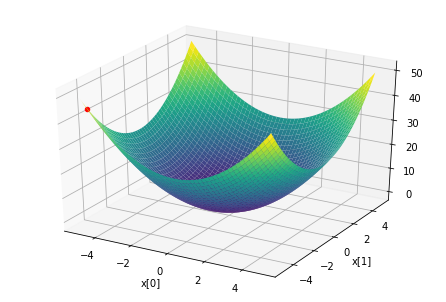

In [10]:
f = sphere
fit = fitness_eval(x, f)

# Plot a graph
step = 0.01
x0 = np.arange(-5, 5, step)
x1 = np.arange(-5, 5, step)

# Create a grid of x0 and x1 using 'np.meshgrid'
x0, x1 = np.meshgrid(x0, x1)

# Evaluate a function $f(x0,x1)$
y = f([x0, x1])

# Plot the function using 'plt.plot_surface'
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)
ax.scatter(x[0], x[1], fit, color='red')

# Formatting the plot
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")    

# 2. Developing classes for GA
- This section mainly explains how to implement GA (loosely) based on object-oriented programming (OOP) concept

## 10 key classes
- GA 			– The core class. Perform a GA run
  - ParameterSet	 – Configure the parameters of a GA run
  - Population 		– A group of individuals
    - Individual 	– Represent a solution using bit string
  - Evaluator 		– Evaluate an individual to obtain its fitness
    - Function		 – the function to be optimized
  - Breeder 		– Reproduce an offspring population 
    - Selector 		– Randomly (with guidance) select an individual
    - Crossover		 – Mix the chromosome of two parents
    - Mutator 		– Randomly mutate the chromosome of a parent

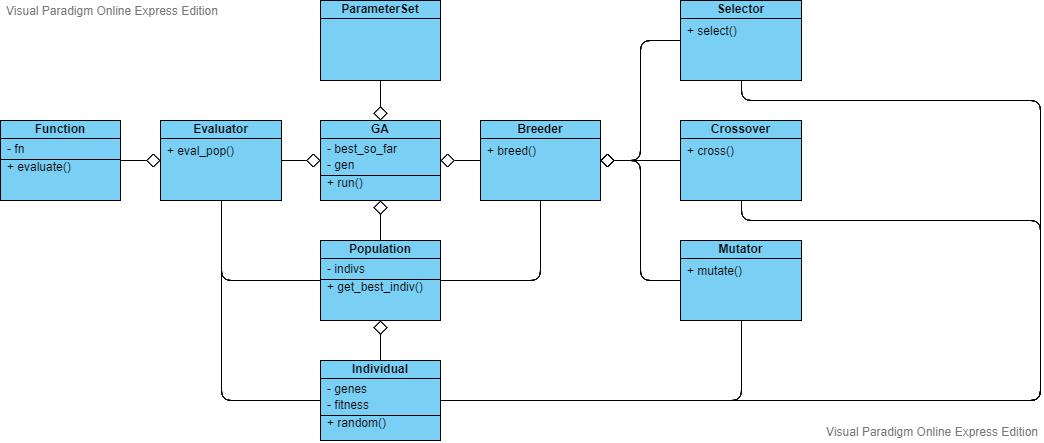

## Derived classes
- Derived classes of `Function`
  - E.g., `TestFunction`, `SphereFunction`, `AuckleyFunction`
- Derived classes of `Selector`
  - E.g., `RouletteWheel`, `TournamentSelector`
- Derived classes of `Crossover`
  - E.g., `OnePointCrossover`, `TwoPointCrossover`, `UniformCrossover`
- Derived classes of `Mutator`
  - E.g., `BitFlipMutator`

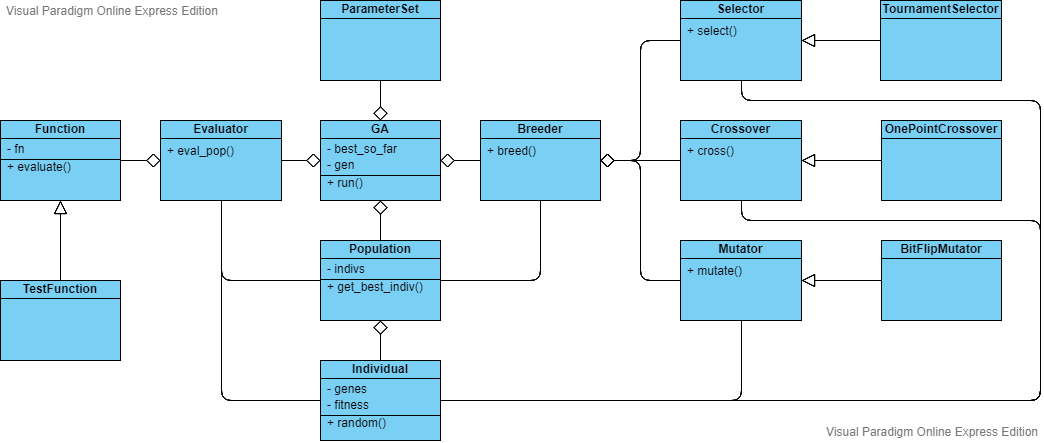

### The `ParameterSet` class
- Store important parameters of a GA run
 - GA's parameters: maximum number of geneartions, population size
 - Representation: individual legnth
 - Breeder: tournament size, crossover rate, mutation rate, elitism

In [11]:
class ParameterSet:
    # Constructor: Assign default parameter values
    def __init__(self):          # Assign default parameters (can be changed after an object is created)
        # Problem-related parameters
        self.is_maximize = True  # Maximization problem or minimization problem
        
        # GA's parameters
        self.max_gen  = 20       # Maximum number of generations
        self.pop_size = 20       # Population size
        
        # Individual-related parameters
        self.num_bits = [4, 4]

        # Breeder-related parameters
        self.ts = 2              # Tournament size
        self.pc = 0.9            # Crossover rate
        self.pm = 0.01           # Mutation rate
        self.elitism = True      # Elitism
        
    # Display parameter values
    def print(self):
        print("--------------------------")
        print("Parameter Setting:")
        if self.is_maximize is True:
            print("Problem: Maximization")
        else:
            print("Problem: Minimization")
        print("Maximum number of generations =", self.max_gen)
        print("Population size =", self.pop_size)
        print("Number of bits per inidividual =", self.num_bits)
        print("Tournament size =", self.ts)
        print("Crossover rate =", self.pc)
        print("Mutation rate =", self.pm)
        print("Elitism =", self.elitism)
        print("--------------------------")

### The `Function` class and its derived classes
- Constructor: length as input
- Evaluation
- Get search space
- Plot
- To string conversion

In [12]:
# ----------------------------
# Base class: Function
# ----------------------------
class Function:
    # Constructor
    def __init__(self):
        self.fn = "20 * np.sin(x[0]) + 10 * np.cos(x[1]) - 0.5 * x[0] * x[1]"   # Function (represetned as a string)
        self.domain = [[-3.0, 3.0], [3.0, 5.0]]
    
    # Evaluate the function for a given solution x
    def evaluate(self, x):
        return eval(self.fn)            # Convert string into expression and evaluate
    
    # Get the number of variables
    def get_num_var(self):
        return len(self.domain)
    
    # Display function's info
    def print(self):
        print("--------------------------")
        print("Function:", self.fn)
        print("Number of variables:", self.get_num_var())
        print("Domain:", self.domain)
        print("--------------------------")
        
    # Convert to string
    def __str__(self):
        return self.fn.replace("np.", "") # To remove "np."

# ----------------------------
# Derived class: Simple1DFunction
# ----------------------------
class Simple1DFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "15 * x - x * x"
        self.domain = [[0, 15]]

# ----------------------------
# Derived class: SphereFunction
# ----------------------------
class SphereFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "x[0] * x[0] + x[1] * x[1]"
        self.domain = [[-5.0, 5.0], [-5.0, 5.0]]
    
# ----------------------------
# Derived class: AckleyFunction
# ----------------------------
class AckleyFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "-20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1])))" + \
                  "- np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20"
        self.domain = [[-5.0, 5.0], [-5.0, 5.0]]       

In [13]:
# Test Function class
fn = SphereFunction()
fn.print()
print("x =", x)
print("y = f(x) =", fn.evaluate(x))

--------------------------
Function: x[0] * x[0] + x[1] * x[1]
Number of variables: 2
Domain: [[-5.0, 5.0], [-5.0, 5.0]]
--------------------------
x = [-5.         -4.33333333]
y = f(x) = 43.77777777777777


## The `Individual` class 
- Constructor: The number of bits to encode each variable is required as input
- Randomize genes
- Provide `is_better_than()` method to compare two individuals
- To string conversion

In [14]:
#----------------------------
DEFAULT_FITNESS = 0.0
#----------------------------
class Individual:
    # Constructor
    def __init__(self, num_bits):       
        self.num_bits = num_bits                   # Number of bits used to represent each variable
        self.genes = np.zeros(self.get_length())   # The chromosome
        self.fitness = DEFAULT_FITNESS             # Fitness value
        self.random()                              # Randomly initialize the chromosome

    # Get the number of bits in the chromosome
    def get_length(self):
        return np.sum(self.num_bits)
        
    # Randomly initialize the chromosome
    def random(self):
        self.genes = np.random.randint(2, size=len(self.genes))
        
    # Compare two individuals based on their fitness
    def is_better_than(self, other):
        return self.fitness > other.fitness # Suppose "the larger fitness, the better individual" is true.
        
    # Convert to string
    def __str__(self):
        return "gene = " + str(self.genes) + ", fit = " + str(format(self.fitness, "10.4f"))

In [15]:
# Test Individual class

from copy import deepcopy
num_bits = [8]                      # 8 bits, one variable
a = Individual(num_bits)
b = deepcopy(a)
a.genes[0] = (a.genes[0] + 1) % 2
a.fitness = 100
print(a)
print(b)

gene = [0 1 0 1 1 0 1 0], fit =   100.0000
gene = [1 1 0 1 1 0 1 0], fit =     0.0000


## The `Population` class
- GA is a population-based optimization method.
- A population of individuals, i.e., solutions, is created and initialized before starting GA.
- Later, another population (offspring) is created from a current population (parent).

In [16]:
class Population:
    # Constructor
    def __init__(self, size, num_bits):
        self.indivs = [Individual(num_bits) for i in range(size)]

    # Get population size (number of individuals)
    def get_pop_size(self):
        return len(self.indivs)

    # Find the best individual in the population
    def get_best_indiv(self):
        best = self.indivs[0]
        for i in self.indivs:
            if i.is_better_than(best):
                best = i
        return best

    # Display the population's info
    def print(self):
        for p in self.indivs:
            print(p)

In [17]:
# Test Population class
pop = Population(5, 10)
pop.indivs[0].fitness = 15
pop.indivs[1].fitness = 24
pop.indivs[2].fitness = -10
pop.indivs[3].fitness = 2
pop.indivs[4].fitness = 18
pop.print()
print()
best = pop.get_best_indiv()
print("Best individual:", best)

gene = [0 1 0 0 0 0 0 0 0 0], fit =    15.0000
gene = [1 0 0 0 1 1 0 1 0 0], fit =    24.0000
gene = [1 1 1 1 0 0 1 1 0 0], fit =   -10.0000
gene = [0 0 1 1 0 1 0 1 1 0], fit =     2.0000
gene = [1 0 0 1 1 1 0 1 0 1], fit =    18.0000

Best individual: gene = [1 0 0 0 1 1 0 1 0 0], fit =    24.0000


## The `Evaluator` class
- Used to evaluate and assign a fitness value to each individual in a population
- For each individual, decode its genes to obtain encoded values, then run the function with the enocded values.

In [18]:
class Evaluator:
    # Constructor
    def __init__(self, function, is_maximize):
        self.function = function
        self.is_maximize = is_maximize
 
    # Evaluate a population
    def eval_pop(self, pop):
        for i in pop.indivs:
            x, f = self.eval_indiv(i)

    # Evaluate an indivual
    def eval_indiv(self, indiv):
        # Decode & evaluate
        x = self.decode(indiv, self.function.domain)
        f = self.function.evaluate(x)
        indiv.fitness = float(f)
        if self.is_maximize is False:
            indiv.fitness = -indiv.fitness # Reverse the sign of fitness for a minimization problem
        return x, f
    
    # Convert bit-string representation to real value
    def decode(self, indiv, interval):
        num_vars = len(indiv.num_bits)
        x = np.zeros(num_vars)
        start, end = 0, 0
        for i in range(num_vars):
            end += indiv.num_bits[i]       # Update end position
            x[i] = self.bin_to_dec(indiv.genes[start:end], interval[i])
            start = end                    # Update start position for the next iteration
        return x

    # Convert binary to decimal
    def bin_to_dec(self, bin, interval):
        seq = "0b" + "".join([str(i) for i in bin])
        return interval[0] + eval(seq) * (interval[1] - interval[0]) / (2 ** len(bin) - 1)

## The `Selector` class and `TournametSelector` class
- Simulate natural selection in biological evolution
- Individuals with better fitness should relatively have higher chances to survive and pass on their DNA to offspring.
- Various selection operators:
 - Roulette wheel selection
 - Tournament selection

In [19]:
import random
# ----------------------------
# Base class: Selector
# ----------------------------
class Selector:
    # Select an individual from a population
    def select(self, pop):                  # Just random selection
        size = pop.get_pop_size()
        rd = random.randint(0, size - 1)
        return pop.indivs[rd]

# ----------------------------
# Derived class: TournamentSelector
# ----------------------------
class TournamentSelector(Selector):
    # Constructor
    def __init__(self, tournament_size):
        super().__init__()
        self.ts = tournament_size

    # Select an individual from a population
    def select(self, pop):
        size = pop.get_pop_size()
        rd = random.randint(0, size - 1)
        best_idx = rd;
        
        for i in range(1, self.ts):
            rd = random.randint(0, size - 1)
            if pop.indivs[rd].is_better_than(pop.indivs[best_idx]):
                best_idx = rd;

        return pop.indivs[best_idx]
#----------------------------

## The `Crossover` class and `OnePointCrossover` class
- Simulate a breeding process
- That is, mixing DNAs of two parents to generate (usually two) offspring

In [20]:
import random
# ----------------------------
# Base class: Crossover
# ----------------------------
class Crossover:
    # Constructor
    def __init__(self, pc):
        self.pc = pc
        
    # Do nothing
    def cross(self, p1, p2):
        return p1, p2  

# ----------------------------
# Derived class: OnePointCrossover
# ----------------------------
class OnePointCrossover(Crossover):
    # Constructor
    def __init__(self, pc):
        super().__init__(pc)

    # Randomly exchange parts of the two individual p1 and p2
    def cross(self, p1, p2):
        rd = random.uniform(0, 1)
        if(rd < self.pc):
            cut_point = random.randint(1, p1.get_length() - 1)
            #print("cutPoint = ", cutPoint)
            p1.genes[cut_point:], p2.genes[cut_point:] = p2.genes[cut_point:], p1.genes[cut_point:]
        return p1, p2  
    
#----------------------------

## The `Mutator` class and `BitFlipMutator` class
- Simulate mutation in biological evolution
- Introduce errors into the reproduction process
- An mutated offspring that possesses a better characteristics is more likely to survive.

In [21]:
import random
# ----------------------------
# Base class: Mutator
# ----------------------------
class Mutator:
    # Constructor
    def __init__(self, pm):
        self.pm = pm
        
    # Do nothing
    def mutate(self, p):
        return p
        
# ----------------------------
# Derived class: BitFlipMutator
# ----------------------------
class BitFlipMutator(Mutator):
    # Constructor
    def __init__(self, pm):
        super().__init__(pm)

    # Randomly mutate some genes in the chromosome
    def mutate(self, p):
        for i in range(p.get_length()):
            rd = random.uniform(0,1)
            if rd < self.pm:
                #print("flip bit ", i)
                if p.genes[i] == 1:
                    p.genes[i] = 0
                else:
                    p.genes[i] = 1
        return p
#----------------------------

## The `Breeder` class
- Used to produce a new population (offspring) from the current population (parent)
- Integrate the three classes: `Selector`, `Crossover`, and `Mutator`

In [22]:
class Breeder:
    # Constructor
    def __init__(self, selector, crossover, mutator, elitism):
        self.selector = selector
        self.crossover = crossover
        self.mutator = mutator
        self.elitism = elitism

    # Generate an offspring population from the parent population
    def breed(self, parent_pop, offspring_pop):
        size = parent_pop.get_pop_size()

        count = 0
        while count < size:
            # Selection
            p1 = deepcopy(self.selector.select(parent_pop))
            p2 = deepcopy(self.selector.select(parent_pop))
            
            # Crossover
            q1, q2 = self.crossover.cross(p1, p2)
            
            # Mutation
            o1 = self.mutator.mutate(q1)
            o2 = self.mutator.mutate(q2)
            
            # Insert new individuals into the offspring popuation
            offspring_pop.indivs[count] = o1
            count += 1
            offspring_pop.indivs[count] = o2
            count += 1

        # Elitist
        if self.elitism is True:
            offspring_pop.indivs[0] = deepcopy(parent_pop.get_best_indiv())


## The `GA` class
- Used to run GA
- Require a `Function` object and a `ParameterSet` object as construction paraemters
- Create a `GA` object and just run
- The best individual found during the evolutionary process will be returned.

In [23]:
import time

class GA:
    # Constructor
    def __init__(self, fn, params=ParameterSet()):
        # Parameter settings
        self.params = params
        
        # Create evaluator
        self.evaluator = Evaluator(fn, params.is_maximize)

        # Create breeder
        selector = TournamentSelector(params.ts)
        crossover = OnePointCrossover(params.pc)
        mutator = BitFlipMutator(params.pm)
        self.breeder = Breeder(selector, crossover, mutator, params.elitism)
       
    # Reset the state GA before starting a run
    def _reset(self):
        self.gen = 0
        self.best_so_far = None
        self.pop1 = Population(self.params.pop_size, self.params.num_bits)
        self.pop2 = Population(self.params.pop_size, self.params.num_bits)

    # Update best-so-far individual
    def _update_best_so_far(self, pop):
        current_best = pop.get_best_indiv()
        if self.best_so_far == None:
            self.best_so_far = deepcopy(current_best)
        elif current_best.is_better_than(self.best_so_far):
            self.best_so_far = deepcopy(current_best)

    # Run GA
    def run(self):
        # Reset GA's state
        self._reset()

        # Loop
        while self.gen < self.params.max_gen:
            # Evaluate current population
            self.evaluator.eval_pop(self.pop1)
            print("--------------------------")
            print("Generation:", self.gen)
            self.pop1.print()

            # Check best-so-far individual
            self._update_best_so_far(self.pop1)         
            print("Best-so-far:", self.best_so_far)
            
            # Breed offspring population
            self.breeder.breed(self.pop1, self.pop2)

            # Swap population
            self.pop1, self.pop2 = self.pop2, self.pop1

            # Increment
            self.gen += 1
            time.sleep(0.5)
            
        return self.best_so_far

## Test the `GA` class: Simple 1D-function

In [24]:
# Create a function object
fn = Simple1DFunction()

# Verify function
fn.print()


# Create a set of GA's parameters
params = ParameterSet()

# Adjust some parameters
params.is_maximize = True
params.max_gen = 10
params.pop_size = 20
params.num_bits = [8]

# Verify parameters
params.print()

--------------------------
Function: 15 * x - x * x
Number of variables: 1
Domain: [[0, 15]]
--------------------------
--------------------------
Parameter Setting:
Problem: Maximization
Maximum number of generations = 10
Population size = 20
Number of bits per inidividual = [8]
Tournament size = 2
Crossover rate = 0.9
Mutation rate = 0.01
Elitism = True
--------------------------


In [25]:
# Create a GA object
ga = GA(fn, params)

# Then, run GA
best_indiv = ga.run()

# Display result
print("\nThe best individual founded by GA:", best_indiv)

print("Solution:")
x = ga.evaluator.decode(best_indiv, ga.evaluator.function.domain)
print("x =", x)
y = ga.evaluator.function.evaluate(x)
print("y = f(x) =", y)

--------------------------
Generation: 0
gene = [0 0 0 1 0 0 1 1], fit =    15.5156
gene = [0 1 1 1 1 0 0 0], fit =    56.0554
gene = [0 0 0 0 1 0 0 0], fit =     6.8374
gene = [0 1 0 0 0 0 1 1], fit =    43.5848
gene = [1 0 0 0 0 1 1 1], fit =    56.0554
gene = [0 0 1 1 1 0 1 0], fit =    39.5363
gene = [1 1 0 0 1 0 1 1], fit =    36.5260
gene = [0 0 1 0 0 0 0 0], fit =    24.6920
gene = [0 0 1 1 0 0 0 1], fit =    34.9273
gene = [1 0 1 1 1 0 1 1], fit =    44.0000
gene = [1 0 0 1 0 1 1 0], fit =    54.4983
gene = [1 1 0 1 1 0 0 0], fit =    29.1488
gene = [0 0 0 1 1 0 0 1], fit =    19.8962
gene = [1 0 1 0 0 1 1 1], fit =    50.8512
gene = [0 0 0 0 0 0 1 0], fit =     1.7509
gene = [1 0 1 0 0 0 1 1], fit =    51.8893
gene = [0 1 1 1 0 0 0 0], fit =    55.4187
gene = [0 0 1 0 0 0 1 0], fit =    26.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [0 1 1 1 1 0 0 1], fit =    56.1038
Best-so-far: gene = [0 1 1 1 1 0 0 1], fit =    56.1038
--------------------------
Generation: 1
ge

--------------------------
Generation: 9
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 0 1 1 1 1 1], fit =    52.5952
gene = [0 1 1 0 1 1 1 1], fit =    55.3080
gene = [0 1 1 0 1 1 1 1], fit =    55.3080
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 1 1 1 1 1 1], fit =    56.2491
gene = [0 1 0 1 1 1 1 1], fit =    52.5952
Best-so-far: gene = [0 1 1 1 1 1 1 1], fit =    56.2491

The best individual founded by GA: gene = 

## Test the `GA` class: Function of two variables

In [26]:
# Create a function object
fn = AckleyFunction()

# Verify function
fn.print()


# Create a set of GA's parameters
params = ParameterSet()

# Adjust some parameters
params.is_maximize = False
params.max_gen = 30
params.pop_size = 50
params.num_bits = [20, 20]

# Verify parameters
params.print()

--------------------------
Function: -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1])))- np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20
Number of variables: 2
Domain: [[-5.0, 5.0], [-5.0, 5.0]]
--------------------------
--------------------------
Parameter Setting:
Problem: Minimization
Maximum number of generations = 30
Population size = 50
Number of bits per inidividual = [20, 20]
Tournament size = 2
Crossover rate = 0.9
Mutation rate = 0.01
Elitism = True
--------------------------


In [27]:
# Create a GA object
ga = GA(fn, params)

# Then, run GA
best_indiv = ga.run()

# Display result
print("\nThe best individual founded by GA:", best_indiv)

print("Solution:")
x = ga.evaluator.decode(best_indiv, ga.evaluator.function.domain)
print("x =", x)
y = ga.evaluator.function.evaluate(x)
print("y = f(x) =", y)

--------------------------
Generation: 0
gene = [1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 1 1], fit =    -5.8022
gene = [0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 1 1], fit =    -9.8671
gene = [0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 0], fit =    -9.2346
gene = [1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 1], fit =    -5.5269
gene = [1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 1], fit =    -4.4519
gene = [0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -3.2853
gene = [0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 1], fit =   -11.2586
gene = [0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 1 1], fit =   -12.7383
gene = [0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1], fit 

--------------------------
Generation: 2
gene = [0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -3.2853
gene = [1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 1], fit =    -7.9527
gene = [1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 1], fit =    -7.2086
gene = [0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 1], fit =    -3.3590
gene = [1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0], fit =    -9.5100
gene = [1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0], fit =    -6.5001
gene = [1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -4.6186
gene = [1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 1 1], fit =    -5.8022
gene = [0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 1], fit 

--------------------------
Generation: 4
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.8422
gene = [1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 1 1], fit =    -3.7099
gene = [0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 1], fit =    -3.3485
gene = [1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 1], fit =    -5.1433
gene = [0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -3.2882
gene = [0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -3.2853
gene = [0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -3.3624
gene = [1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -6.3358
gene = [1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0], fit 

--------------------------
Generation: 6
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0], fit =    -2.6964
gene = [1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -3.3461
gene = [0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0], fit =    -3.2882
gene = [0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0], fit =    -3.4629
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0], fit =    -2.8197
gene = [0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0], fit =    -3.3521
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0
 1 0 1], fit =    -4.5414
gene = [1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 1], fit =    -4.4654
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 0], fit 

--------------------------
Generation: 8
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.6045
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.8422
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.8421
gene = [1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 1], fit =    -2.7788
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0], fit =    -2.8197
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.8420
gene = [1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0], fit =    -3.1750
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.7573
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit 

--------------------------
Generation: 10
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.4730
gene = [0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -3.5822
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -2.6122
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -2.6122
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -2.6054
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 1 1 0], fit =    -2.6044
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.8366
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.8366
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit

--------------------------
Generation: 12
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -0.1733
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0], fit =    -2.4736
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.4736
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 1], fit =    -2.4736
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0], fit =    -2.6040
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.8366
gene = [1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.4924
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -8.3101
gene = [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1
 1 1 1], fit

--------------------------
Generation: 14
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -0.1733
gene = [1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -1.9480
gene = [1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -2.3452
gene = [0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -3.1107
gene = [1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -2.3324
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -2.4732
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0], fit =    -1.6731
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0], fit =    -0.1733
gene = [0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit

--------------------------
Generation: 16
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.1564
gene = [1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 1], fit =    -2.3484
gene = [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -2.4685
gene = [1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0], fit =    -2.6520
gene = [1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0], fit =   -10.3556
gene = [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 0], fit =    -2.4805
gene = [0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1
 0 1 0], fit =    -2.6044
gene = [1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -1.9113
gene = [1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1], fit

--------------------------
Generation: 18
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.0207
gene = [0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -0.2227
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0], fit =    -0.1551
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.1564
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 1 0], fit =    -0.1562
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.1564
gene = [1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -4.0005
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.1564
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit

--------------------------
Generation: 20
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.0207
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 0], fit =    -0.1592
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 1 0], fit =    -0.1679
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0], fit =    -0.1781
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0], fit =    -1.1542
gene = [1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1
 1 1 0], fit =    -0.0857
gene = [0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1], fit =    -7.6360
gene = [1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1], fit =    -0.0936
gene = [0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit

--------------------------
Generation: 22
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1], fit =    -0.0181
gene = [1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1], fit =    -0.0712
gene = [1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1], fit =    -4.4238
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 0 1], fit =    -0.0464
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 0], fit =    -0.0211
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit =    -0.0207
gene = [0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0], fit =    -0.6644
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0], fit =    -0.1549
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0], fit

--------------------------
Generation: 24
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0], fit =    -0.0179
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1], fit =    -0.0216
gene = [0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1], fit =    -2.2259
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1], fit =    -0.0605
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1], fit =    -0.0465
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1], fit =    -0.0465
gene = [1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1], fit =    -3.2572
gene = [0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1], fit =    -0.0246
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1], fit

--------------------------
Generation: 26
gene = [0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1], fit =    -0.0164
gene = [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 0], fit =    -0.3811
gene = [0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1], fit =    -0.1609
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1], fit =    -0.0261
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1], fit =    -0.0465
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1], fit =    -0.0465
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0], fit =    -0.0179
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0], fit =    -0.0179
gene = [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 0], fit

--------------------------
Generation: 28
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1], fit =    -0.0036
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1], fit =    -0.0037
gene = [0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1], fit =    -0.0164
gene = [0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1], fit =    -0.0164
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0], fit =    -0.0179
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 1], fit =    -0.0165
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 1], fit =    -0.0161
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1], fit =    -0.0022
gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1], fit


The best individual founded by GA: gene = [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1], fit =    -0.0022
Solution:
x = [-0.00059605  0.00049114]
y = f(x) = 0.002200361986645305


# 3. Plotting graphs
- Four classes need to be modified in order to show graph during and after a GA run
  - The `Function` class: Need to add a function to show how the function looks like.
  - The `Evaluator` class: Plot the location of each individual in the current population.
  - The `Population` class: Need a function to calculate population's statistics.
  - The `GA` class: Collect the statistics of a GA run.

## Modifying the `Function` class
- Add `plot()`, `plot1D()`, and `plot2D()` methods to the class
- Note: Do not support plotting a function with three or more variables

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# Base class: Function
# ----------------------------
class Function:
    # Constructor
    def __init__(self):
        self.fn = "20 * np.sin(x[0]) + 10 * np.cos(x[1]) - 0.5 * x[0] * x[1]"   # Function (represetned as a string)
        self.domain = [[-3.0, 3.0], [3.0, 5.0]]
        self.is_maximize = True # <-------- New
    
    # Evaluate the function for a given solution x
    def evaluate(self, x):
        return eval(self.fn)            # Convert string into expression and evaluate
    
    # Get the number of variables
    def get_num_var(self):
        return len(self.domain)
    
    # Display function's info
    def print(self):
        print("--------------------------")
        print("Function:", self.fn)
        print("Number of variables:", self.get_num_var())
        print("Domain:", self.domain)
        print("--------------------------")
    
    # <------------------------------ New
    # Visualize the function as a graph
    def plot(self, fig, is_maximize):
        if self.get_num_var() == 1:
            self.plot1D(fig, is_maximize)
        elif self.get_num_var() == 2:
            self.plot2D(fig, is_maximize)
        else:
            print("Error: Do not support plotting a function with three or more variables.")
    # <------------------------------ New
    
    # <------------------------------ New
    # Visualize 1D function as a graph
    def plot1D(self, fig, is_maximize):
        # Evaluate the function $y = f(x)$
        step = 0.01
        x = np.arange(self.domain[0][0], self.domain[0][1], step)
        y = self.evaluate(x)

        # Plot the function
        plt.plot(x, y)
        plt.grid(True)
        plt.xlabel("x")
        plt.ylabel("y = f(x)")
        plt.title(str(self))
        
        # Add text 
        if is_maximize is True:
            op_idx = np.argmax(y)
            text = "max ≈ "
        else:
            op_idx = np.argmin(y) 
            text = "min ≈ "           
        plt.text(x[op_idx], y[op_idx], text + format(y[op_idx], ".4f"))  # Add text at min/max position
        plt.scatter(x[op_idx], y[op_idx], color='red')
        
        # Show figure
        fig.show()
    # <------------------------------ New
    
    # <------------------------------ New
    # Visualize 2D function as a graph
    def plot2D(self, fig, is_maximize):
        # Evaluate the function $f(x0,x1)$
        step = 0.01
        x0 = np.arange(self.domain[0][0], self.domain[0][1], step)
        x1 = np.arange(self.domain[1][0], self.domain[1][1], step)
        x0, x1 = np.meshgrid(x0, x1)   
        y = self.evaluate([x0, x1])

        # Plot the function using 'plt.plot_surface'
        ax = Axes3D(fig)
        surf = ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)
        ax.set_xlabel("x[0]")
        ax.set_ylabel("x[1]")
        ax.set_title(str(self))
        
        # Add a color bar
        fig.colorbar(surf, shrink = 0.5, aspect = 5)
        
        # Add text 
        if is_maximize is True:
            op_idx = np.argmax(y)
            text = "max ≈ "
        else:
            op_idx = np.argmin(y) 
            text = "min ≈ "     
        row = op_idx // len(x0[0])  # Find the location of min/max
        col = op_idx %  len(x0[0])  # Find the location of min/max
        ax.text(x0[0][col], x1[row][0], y[row][col], text + format(y[row][col], ".4f"))  # Add text at min/max position

        # Show figure
        fig.show()
    # <------------------------------ New
   
    # Convert to string
    def __str__(self):
        return self.fn.replace("np.", "") # To remove "np."

# ----------------------------
# Derived class: Simple1DFunction
# ----------------------------
class Simple1DFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "15 * x - x * x"
        self.domain = [[0, 15]]

# ----------------------------
# Derived class: SphereFunction
# ----------------------------
class SphereFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "x[0] * x[0] + x[1] * x[1]"
        self.domain = [[-5.0, 5.0], [-5.0, 5.0]]

# ----------------------------
# Derived class: AckleyFunction
# ----------------------------
class AckleyFunction(Function):
    # Constructor
    def __init__(self):
        self.fn = "-20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1])))" + \
                  "- np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20"
        self.domain = [[-5.0, 5.0], [-5.0, 5.0]]

C:\Users\Ukrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ukrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


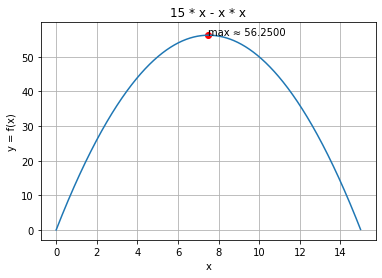

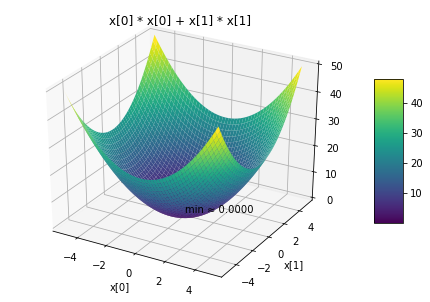

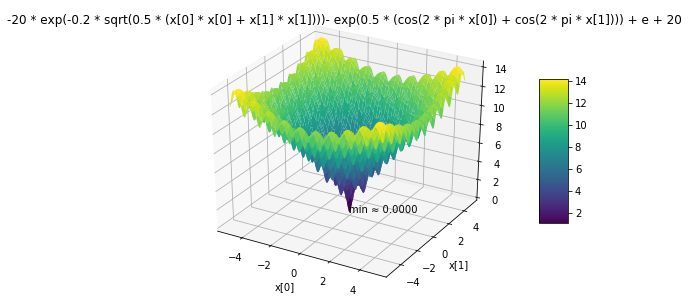

In [29]:
fn = Simple1DFunction()
fn.plot(plt.figure(1), is_maximize=True)

fn = SphereFunction()
fn.plot(plt.figure(2), is_maximize=False)

fn = AckleyFunction()
fn.plot(plt.figure(3), is_maximize=False)

## Modifying the `Evaluator` class
- Modify the `eval_pop` method so that once an individual is evaluated, its decoded value and function value is plotted on the graph.

In [30]:
class Evaluator:
    # Constructor
    def __init__(self, function, is_maximize):
        self.function = function
        self.is_maximize = is_maximize
 
    # Evaluate a population
    def eval_pop(self, pop, fig): # <-------- Modified
        # Plot function
        fig.clf() # Clear figure <-------- New
        self.function.plot(fig, self.is_maximize) # <-------- New
        
        # Evaluate each individual
        for i in pop.indivs:
            x, f = self.eval_indiv(i)
            
            # <------------------------------ New
            # Plot each individual              
            if self.function.get_num_var() == 1: 
                ax = fig.gca()
                ax.plot(x, f, 'r+')            
            elif self.function.get_num_var() == 2:
                ax = fig.gca(projection = '3d')
                ax.plot([x[0]], [x[1]], f, 'r+')
            else:
                print("Error: Do not support plotting a function with three or more variables.")
            # <------------------------------ New
            
    # Evaluate an indivual
    def eval_indiv(self, indiv):
        # Decode & evaluate
        x = self.decode(indiv, self.function.domain)
        f = self.function.evaluate(x)
        indiv.fitness = float(f)
        if self.is_maximize is False:
            indiv.fitness = -indiv.fitness # Reverse the sign of fitness for a minimization problem
        return x, f
    
    # Convert bit-string representation to real value
    def decode(self, indiv, interval):
        num_vars = len(indiv.num_bits)
        x = np.zeros(num_vars)
        start, end = 0, 0
        for i in range(num_vars):
            end += indiv.num_bits[i] # Update end position
            x[i] = self.bin_to_dec(indiv.genes[start:end], interval[i])
            start = end              # Update start position for the next iteration
        return x

     # Convert binary to decimal
    def bin_to_dec(self, bin, interval):
        seq = "0b" + "".join([str(i) for i in bin])
        return interval[0] + eval(seq) * (interval[1] - interval[0]) / (2 ** len(bin) - 1)

## Modifying the `Population` class
- Add `get_fitness_stat()` method to compute the average and standard deviation (SD) of population's fitness.
  - Required by the `GA` class which collects run's statistics and keeps updating graphs.

In [31]:
class Population:
    # Constructor
    def __init__(self, size, num_bits):
        self.indivs = [Individual(num_bits) for i in range(size)]

    # Get population size (number of individuals)
    def get_pop_size(self):
        return len(self.indivs)

    # Find the best individual in the population
    def get_best_indiv(self):
        best = self.indivs[0]
        for i in self.indivs:
            if i.is_better_than(best):
                best = i
        return best
    
    # <------------------------------ New
    # Calculate mean fitness and SD
    def get_fitness_stat(self):
        fit_list = self.get_pop_size() * [0]
        for idx in range(self.get_pop_size()):
            fit_list[idx] = self.indivs[idx].fitness
        return np.mean(fit_list), np.std(fit_list)
    # <------------------------------ New
        
    # Display the population's info
    def print(self):
        for p in self.indivs:
            print(p)

## Modifying the `GA` class
- Modify the `run` method to plot two graphs:
  - The function with plots of individual in the current population
  - Run's statistics
- Add a `plot` method which plots a graph of run's statistics
  - Best-so-far fitness
  - Average fitness
  - Standard deviation (SD) of fitness

In [32]:
import time

class GA:
    # Constructor
    def __init__(self, fn, params=ParameterSet()):
        # Create evaluator
        self.evaluator = Evaluator(fn, params.is_maximize)

        # Parameter settings
        self.params = params
    
        # Create breeder
        selector = TournamentSelector(params.ts)
        crossover = OnePointCrossover(params.pc)
        mutator = BitFlipMutator(params.pm)
        self.breeder = Breeder(selector, crossover, mutator, params.elitism)
       
    # Reset the state GA before starting a run
    def _reset(self):
        self.gen = 0
        self.best_so_far = None
        self.pop1 = Population(self.params.pop_size, self.params.num_bits)
        self.pop2 = Population(self.params.pop_size, self.params.num_bits)

    # Update best-so-far individual
    def _update_best_so_far(self, pop):
        current_best = pop.get_best_indiv()
        if self.best_so_far == None:
            self.best_so_far = deepcopy(current_best)
        elif current_best.is_better_than(self.best_so_far):
            self.best_so_far = deepcopy(current_best)

    # Run GA
    def run(self):
        # Reset GA's state
        self._reset()
        
        # Statistics
        gen_list = list() # <-------- New
        bsf_list = list() # <-------- New
        avg_list = list() # <-------- New
        sd_list  = list() # <-------- New

        # Loop
        while self.gen < self.params.max_gen:
            # Evaluate current population
            self.evaluator.eval_pop(self.pop1, plt.figure(1)) # <-------- Modified
            print("--------------------------")
            print("Generation:", self.gen)
            self.pop1.print()

            # Check best-so-far individual
            self._update_best_so_far(self.pop1)         
            print("Best-so-far:", self.best_so_far)
            
            # Update plot
            self.plot(gen_list, bsf_list, avg_list, sd_list) # <-------- New
            
            # Breed offspring population
            self.breeder.breed(self.pop1, self.pop2)

            # Swap population
            self.pop1, self.pop2 = self.pop2, self.pop1

            # Increment
            self.gen += 1
            time.sleep(0.5)
            
        return self.best_so_far
    
    # <------------------------------ New
    # Visualize the state of GA run
    def plot(self, gen_list, bsf_list, avg_list, sd_list):
        # Update list
        gen_list.append(self.gen)
        bsf_list.append(self.best_so_far.fitness)
        avg, sd = self.pop1.get_fitness_stat()
        avg_list.append(avg)
        sd_list.append(sd)

        # Clear figure and re-plot
        plt.figure(2)                               # Choose a figure
        plt.clf()                                   # Clear figure
        plt.plot(gen_list, bsf_list, label = 'Best-so-far')
        plt.errorbar(gen_list, avg_list, sd_list, label = 'Avg & SD')

        # Graph settings
        ax = plt.gca()                              # Get current axis
        ax.set_xlim(xmin = -0.5, xmax = self.params.max_gen)
        #ax.set_xticks(gen_list, minor = True)      # Set x-ticks according to generations
        ax.set_xticks(gen_list)                     # Set x-ticks according to generations
        yticks = list(ax.get_yticks())          
        yticks.append(self.best_so_far.fitness)     # Add best-so-far to (auto) y-ticks
        ax.set_yticks( yticks )                     # Aet y-ticks      
        ax.grid()                                   # Show grid
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title("Simple GA")
        ax.set_ylabel('Fitness')
        ax.set_xlabel('Generation')

        # Show and pause
        plt.show(block = False)
        plt.pause(0.01)   
    # <------------------------------ New

## Test the modified `GA` class: Simple 1D-function

In [33]:
# Create a function object
fn = Simple1DFunction()

# Verify function
fn.print()


# Create a set of GA's parameters
params = ParameterSet()

# Adjust some parameters
params.is_maximize = True
params.max_gen = 10
params.pop_size = 20
params.num_bits = [8]

# Verify parameters
params.print()

--------------------------
Function: 15 * x - x * x
Number of variables: 1
Domain: [[0, 15]]
--------------------------
--------------------------
Parameter Setting:
Problem: Maximization
Maximum number of generations = 10
Population size = 20
Number of bits per inidividual = [8]
Tournament size = 2
Crossover rate = 0.9
Mutation rate = 0.01
Elitism = True
--------------------------


--------------------------
Generation: 0
gene = [0 0 0 1 1 1 1 0], fit =    23.3564
gene = [0 1 0 1 1 0 0 0], fit =    50.8512
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 0 0 0 0 0 0 1], fit =     0.8789
gene = [1 0 1 1 0 1 1 1], fit =    45.5917
gene = [0 0 1 0 1 1 0 1], fit =    32.6990
gene = [1 1 1 0 1 0 0 0], fit =    18.4637
gene = [1 1 0 0 1 1 0 1], fit =    35.4671
gene = [0 0 0 1 0 0 1 0], fit =    14.7612
gene = [0 1 1 0 1 1 1 1], fit =    55.3080
gene = [1 0 1 0 0 0 1 1], fit =    51.8893
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [1 1 1 1 0 0 1 0], fit =    10.8858
gene = [1 0 1 0 0 1 1 1], fit =    50.8512
gene = [0 1 1 0 0 1 1 0], fit =    54.0000
gene = [0 1 0 1 1 1 1 0], fit =    52.3668
gene = [1 1 0 0 0 0 1 0], fit =    40.9481
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 1 1 1 0 0 0 1], fit =    11.6747
gene = [0 0 0 0 1 1 1 1], fit =    12.4567
Best-so-far: gene = [1 0 0 0 1 0 0 1], fit =    55.9377


C:\Users\Ukrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


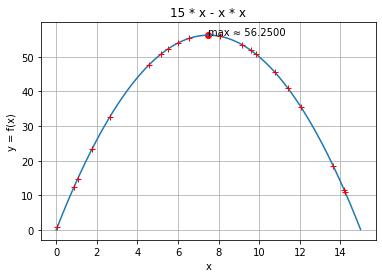

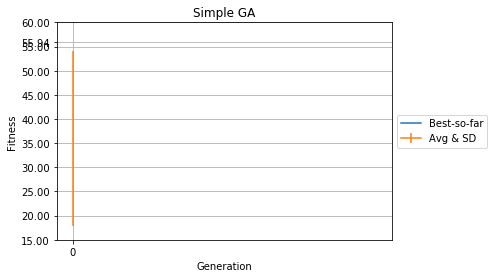

--------------------------
Generation: 1
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 1 1 1 0 1 1 1], fit =     6.8374
gene = [1 0 1 1 0 1 1 1], fit =    45.5917
gene = [1 0 1 0 0 0 1 1], fit =    51.8893
gene = [1 1 0 0 1 1 1 1], fit =    34.3806
gene = [1 1 0 0 1 1 0 1], fit =    35.4671
gene = [1 0 0 1 1 0 1 1], fit =    53.6332
gene = [1 0 1 0 0 0 1 1], fit =    51.8893
gene = [0 1 1 0 0 1 1 0], fit =    54.0000
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [1 1 0 1 1 1 1 0], fit =    25.3495
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [0 1 0 0 1 1 0 1], fit =    47.4256
gene = [1 1 0 0 1 1 0 1], fit =    35.4671
gene = [0 1 0 1 1 1 1 0], fit =    52.3668
gene = [0 0 0 1 0 0 1 0], fit =    14.7612
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [1 0 0 1 1 1 0 1], fit =    53.2388
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
Best-so-far: gene = [1 0 0 0 1 0 0 1], fit =    55.9377


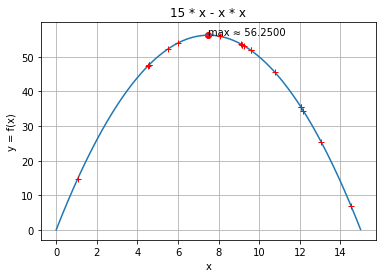

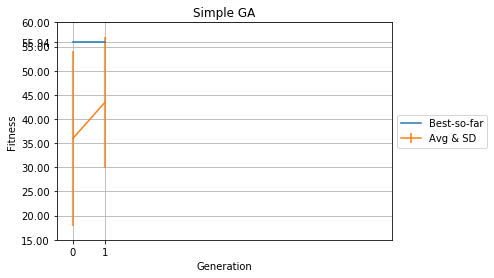

--------------------------
Generation: 2
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 1 0 0 0 1 1], fit =    51.8893
gene = [1 0 1 0 0 1 0 0], fit =    51.6401
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [0 1 1 0 0 1 1 0], fit =    54.0000
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 1 0 0 1 1 0 1], fit =    35.4671
gene = [0 1 0 1 1 1 1 1], fit =    52.5952
gene = [0 1 0 0 1 1 0 1], fit =    47.4256
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 1 0 1 1 0 1 1], fit =    51.6401
gene = [1 0 0 1 1 0 1 1], fit =    53.6332
gene = [1 0 1 0 0 0 1 0], fit =    52.1315
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
Best-so-far: gene = [1 0 0 0 1 0 0 1], fit =    55.9377


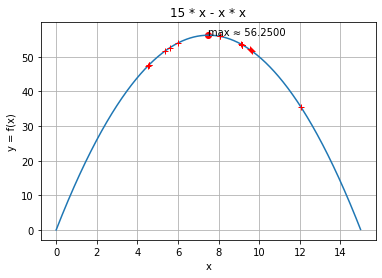

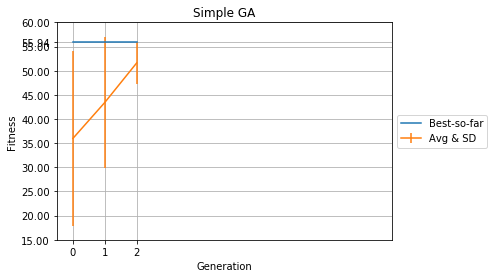

--------------------------
Generation: 3
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [0 1 0 1 1 1 0 0], fit =    51.8893
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 1 1 0 0 1 1 0], fit =    54.0000
gene = [0 1 0 0 1 1 1 0], fit =    47.7716
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [0 1 1 0 0 1 1 0], fit =    54.0000
gene = [0 0 0 1 1 1 0 0], fit =    21.9931
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
Best-so-far: gene = [1 0 0 0 1 0 0 0], fit =    56.0000


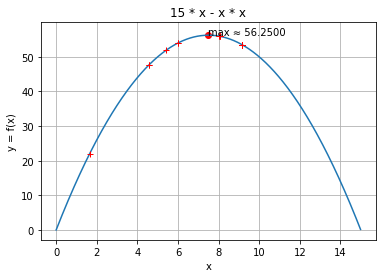

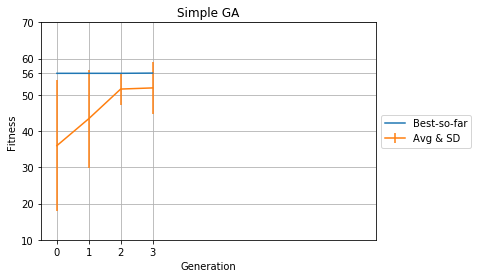

--------------------------
Generation: 4
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 0 1 1 0], fit =    56.1038
gene = [1 1 0 0 0 1 1 0], fit =    39.0519
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 1 0 1 0 0 0], fit =    50.5744
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 0 0 0 1], fit =    56.2422
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 1 1 1 0 0], fit =    53.4394
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
Best-so-far: gene = [1 0 0 0 0 0 0 1], fit =    56.2422


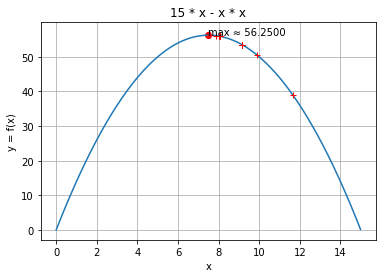

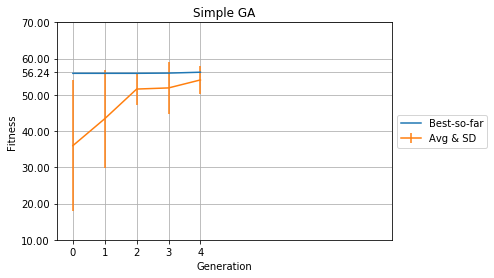

--------------------------
Generation: 5
gene = [1 0 0 0 0 0 0 1], fit =    56.2422
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 1], fit =    56.2422
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 1 0 1], fit =    56.1453
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 1 1 0 0 0], fit =    54.1730
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
Best-so-far: gene = [1 0 0 0 0 0 0 0], fit =    56.2491


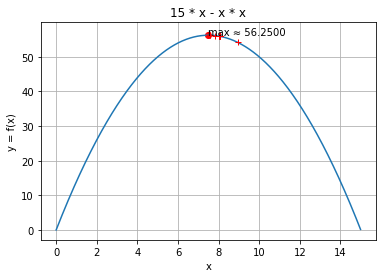

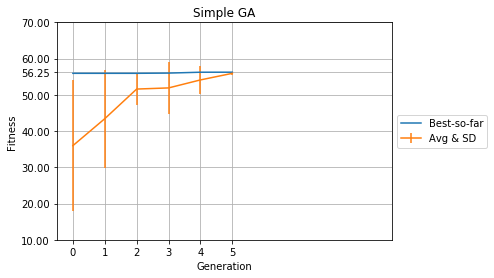

--------------------------
Generation: 6
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 1], fit =    55.9377
gene = [0 0 0 0 0 1 0 1], fit =     4.3253
gene = [1 0 0 0 0 0 0 1], fit =    56.2422
gene = [1 0 0 0 0 0 0 1], fit =    56.2422
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
Best-so-far: gene = [1 0 0 0 0 0 0 0], fit =    56.2491


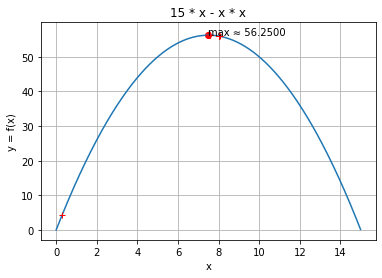

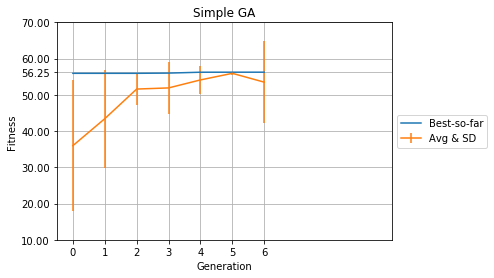

--------------------------
Generation: 7
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 1 0 0 0 0 0 0], fit =    41.8547
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [0 0 0 0 0 0 0 0], fit =     0.0000
Best-so-far: gene = [1 0 0 0 0 0 0 0], fit =    56.2491


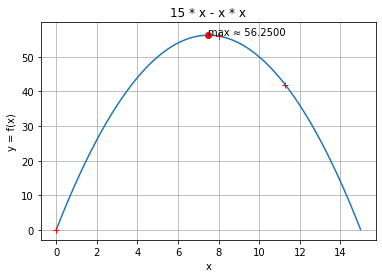

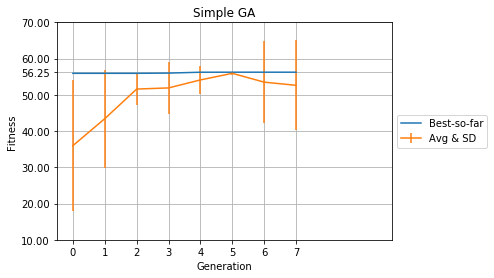

--------------------------
Generation: 8
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 1 0 1 0], fit =    55.8685
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
Best-so-far: gene = [1 0 0 0 0 0 0 0], fit =    56.2491


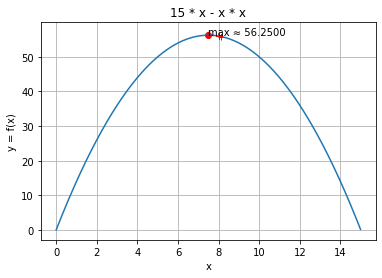

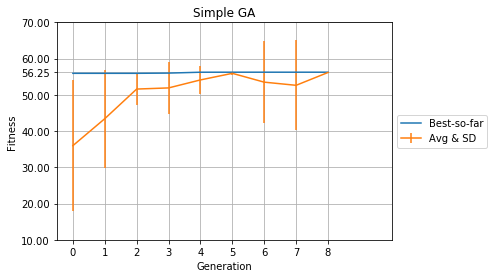

--------------------------
Generation: 9
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 1 0 0 0 0 0 0], fit =    41.8547
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 1 0 0 0 0 0], fit =    52.5952
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 1 0 0], fit =    56.1799
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
gene = [1 0 0 0 1 0 0 0], fit =    56.0000
gene = [1 0 0 0 0 0 0 0], fit =    56.2491
Best-so-far: gene = [1 0 0 0 0 0 0 0], fit =    56.2491


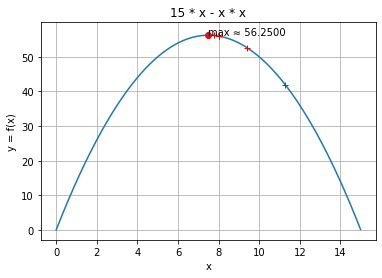

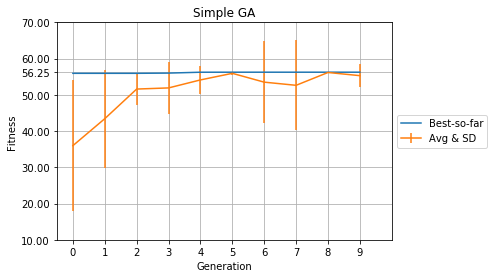


The best individual founded by GA: gene = [1 0 0 0 0 0 0 0], fit =    56.2491
Solution:
x = [7.52941176]
y = f(x) = [56.24913495]


In [34]:
# Create a GA object
ga = GA(fn, params)

# Then, run GA
best_indiv = ga.run()

# Display result
print("\nThe best individual founded by GA:", best_indiv)

print("Solution:")
x = ga.evaluator.decode(best_indiv, ga.evaluator.function.domain)
print("x =", x)
y = ga.evaluator.function.evaluate(x)
print("y = f(x) =", y)

## Test the modified `GA` class: Function of two variables

In [35]:
# Create a function object
fn = AckleyFunction()

# Verify function
fn.print()


# Create a set of GA's parameters
params = ParameterSet()

# Adjust some parameters
params.is_maximize = False
params.max_gen = 30
params.pop_size = 50
params.num_bits = [20, 20]

# Verify parameters
params.print()

--------------------------
Function: -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1])))- np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20
Number of variables: 2
Domain: [[-5.0, 5.0], [-5.0, 5.0]]
--------------------------
--------------------------
Parameter Setting:
Problem: Minimization
Maximum number of generations = 30
Population size = 50
Number of bits per inidividual = [20, 20]
Tournament size = 2
Crossover rate = 0.9
Mutation rate = 0.01
Elitism = True
--------------------------


C:\Users\Ukrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


--------------------------
Generation: 0
gene = [0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0
 0 0 0], fit =    -9.5367
gene = [0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0], fit =    -4.0691
gene = [1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1
 1 0 0], fit =    -8.5998
gene = [1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 0], fit =   -12.0056
gene = [0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0
 1 0 1], fit =   -10.2598
gene = [1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 1 0], fit =    -7.6771
gene = [1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1], fit =    -8.3677
gene = [0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0], fit =   -13.2812
gene = [0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 1], fit 

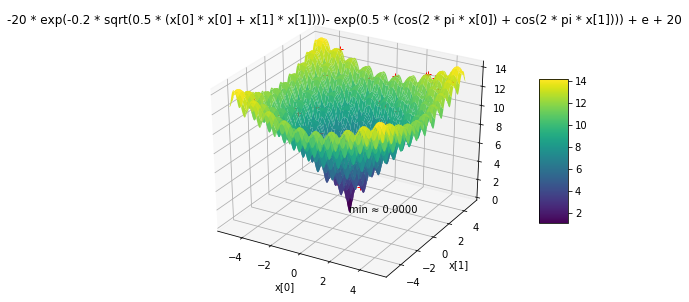

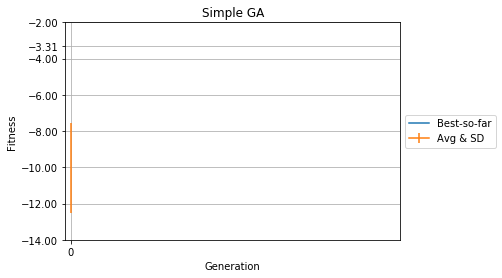

--------------------------
Generation: 1
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 0 1], fit =    -9.9721
gene = [1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 0], fit =    -7.9888
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1], fit =    -6.3936
gene = [1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1], fit =    -9.4307
gene = [1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 1], fit =    -8.9427
gene = [0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 0 1], fit =    -9.3905
gene = [1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1], fit 

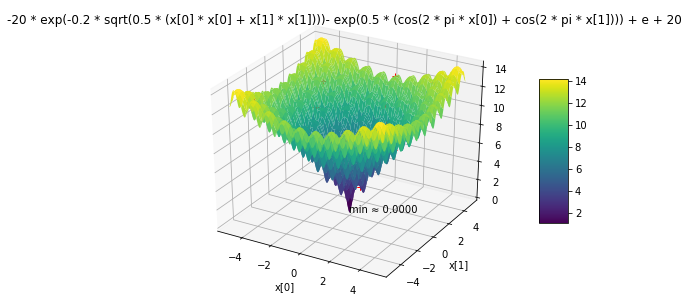

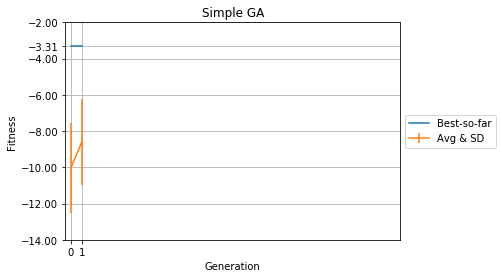

--------------------------
Generation: 2
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 1 0], fit =    -9.2183
gene = [1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -4.0514
gene = [1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 1 1 1], fit =    -4.7445
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -3.3100
gene = [0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 0], fit =   -11.2443
gene = [0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1], fit 

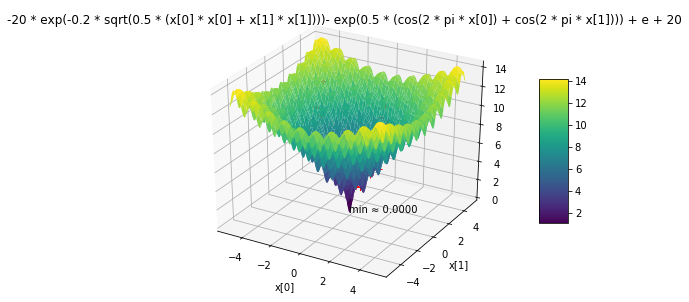

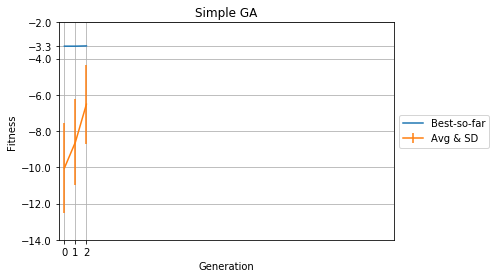

--------------------------
Generation: 3
gene = [0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3004
gene = [0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0
 1 1 0], fit =    -8.3422
gene = [1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 1 1 0], fit =    -6.1269
gene = [1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 0], fit =    -5.5327
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -3.3100
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1
 0 0 0], fit =    -5.2103
gene = [0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1], fit 

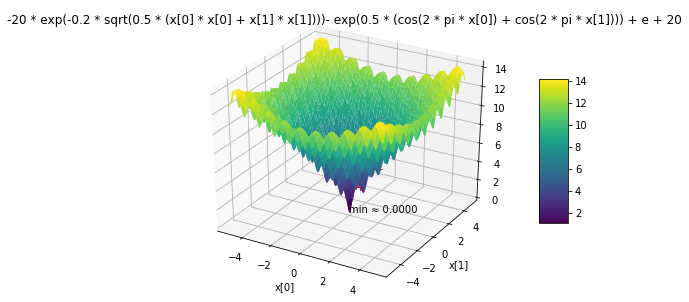

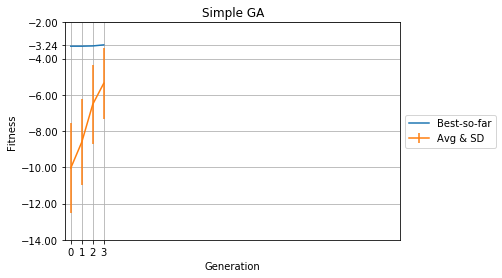

--------------------------
Generation: 4
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0
 1 1 1], fit =    -3.2429
gene = [0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -4.8476
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -3.3145
gene = [1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 1 1 1], fit =    -4.7445
gene = [0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0], fit =    -5.5653
gene = [1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0], fit =    -7.2333
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 0], fit =    -4.3031
gene = [1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 0], fit =    -4.7447
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1], fit 

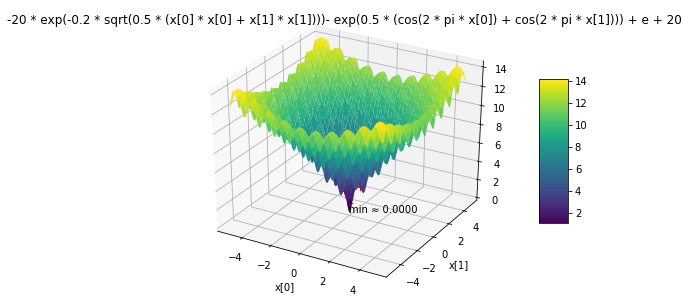

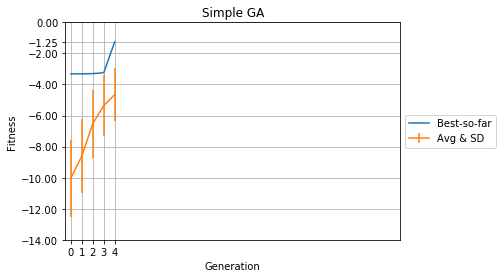

--------------------------
Generation: 5
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0], fit =    -1.2503
gene = [1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -4.0514
gene = [1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0], fit =    -5.6668
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -3.3089
gene = [1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0], fit =    -3.2736
gene = [1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0], fit =    -6.7525
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 1 1], fit =    -3.2402
gene = [1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1], fit =    -8.4194
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 1], fit 

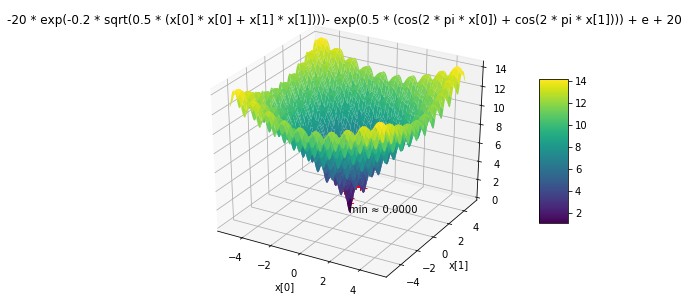

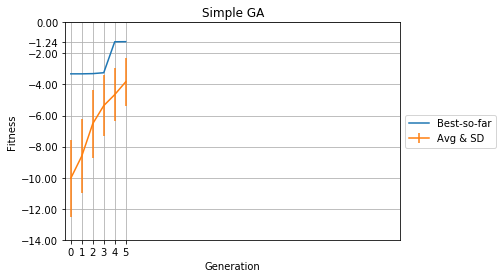

--------------------------
Generation: 6
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -1.2436
gene = [0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 1], fit =    -3.3003
gene = [0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -2.3957
gene = [1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -5.6817
gene = [0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0
 1 1 1], fit =    -4.2150
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -3.3089
gene = [1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -3.5254
gene = [0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1], fit =    -3.3004
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 0], fit 

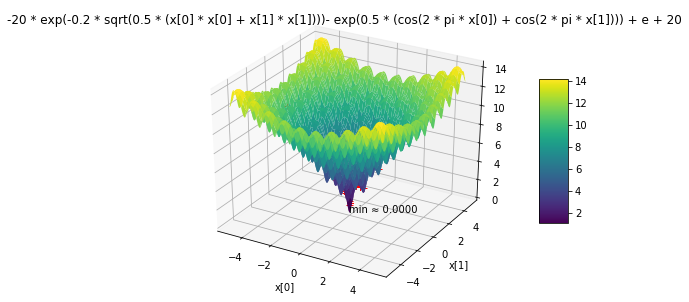

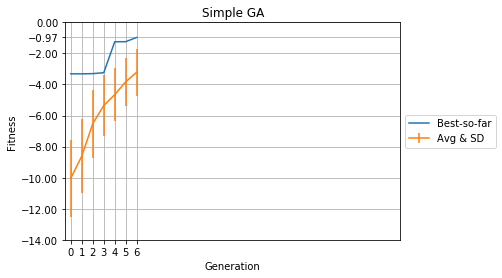

--------------------------
Generation: 7
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 1 0], fit =    -0.9698
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 0], fit =    -1.2520
gene = [1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -5.6749
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 0 1], fit =    -3.2403
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0], fit =    -3.3101
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -1.2436
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0], fit =    -1.2536
gene = [0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0], fit =    -2.6716
gene = [1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit 

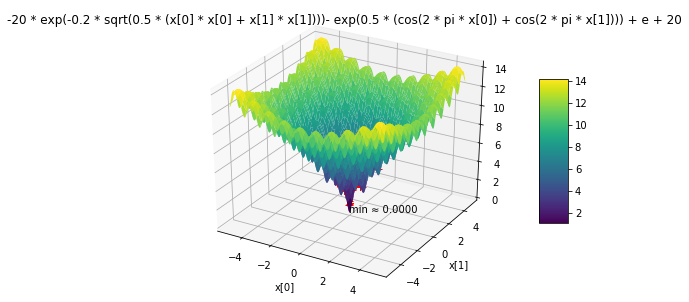

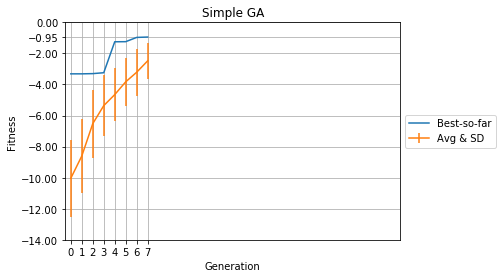

--------------------------
Generation: 8
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9452
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0], fit =    -1.2511
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0], fit =    -0.9850
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0], fit =    -1.2503
gene = [0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0], fit =    -2.3655
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0], fit =    -1.2439
gene = [0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -2.3641
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -0.9755
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1], fit 

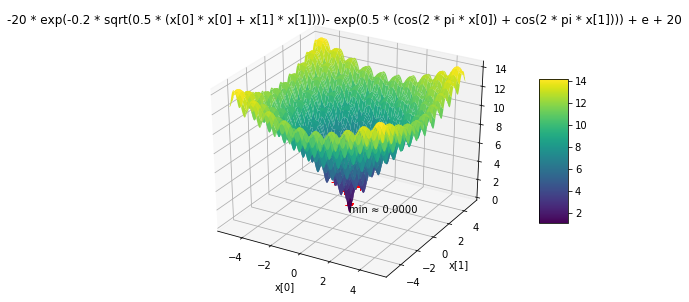

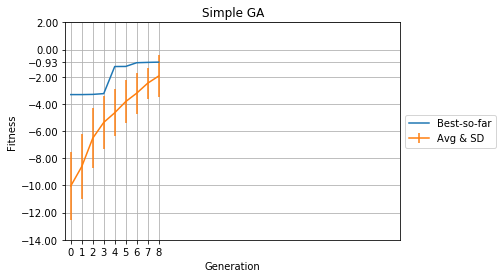

--------------------------
Generation: 9
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0], fit =    -0.9264
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -1.2436
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0], fit =    -1.2436
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0], fit =    -7.7471
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0], fit =    -0.9804
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0], fit =    -5.3361
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 1 0], fit =    -0.9792
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0], fit =    -1.2462
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1], fit 

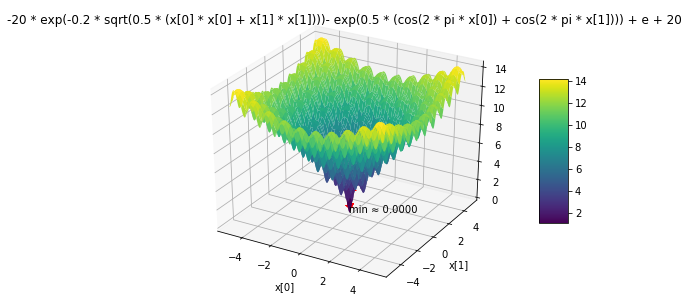

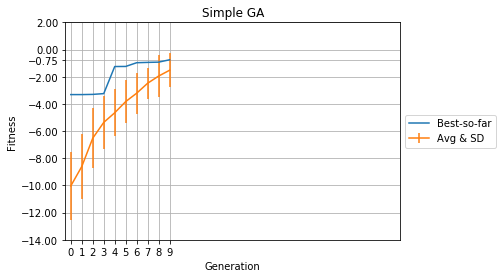

--------------------------
Generation: 10
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 0], fit =    -0.7542
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -0.8662
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9452
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 0], fit =    -1.2120
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9452
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0], fit =    -0.9449
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0], fit =    -0.9880
gene = [1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0], fit =    -1.2439
gene = [1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0], fit

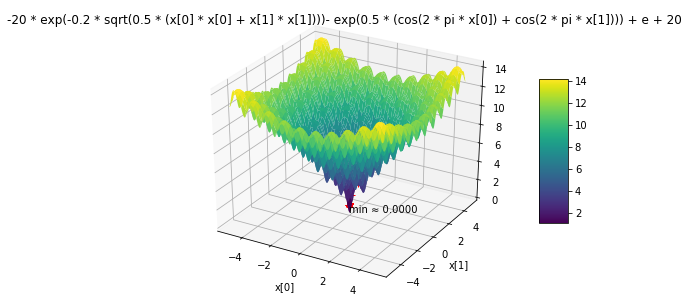

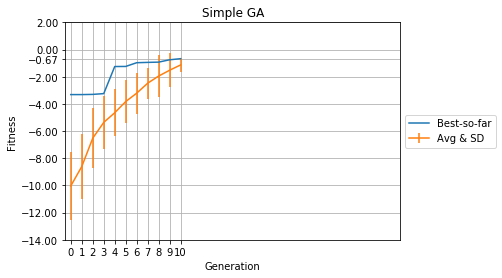

--------------------------
Generation: 11
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -0.6727
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -0.8656
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -0.8650
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -0.8650
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -2.9449
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1], fit =    -1.1533
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9452
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9452
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0], fit

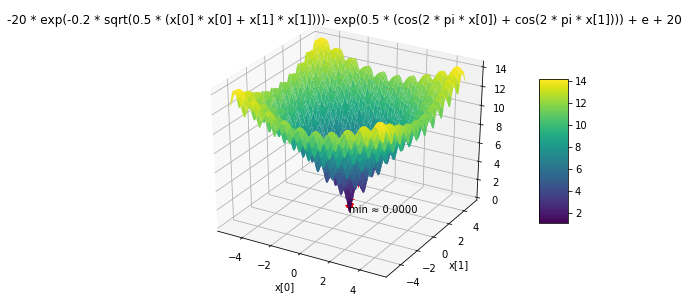

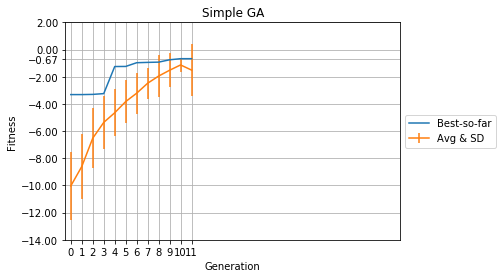

--------------------------
Generation: 12
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -0.6727
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -0.9755
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -0.9749
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -0.9755
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 1], fit =    -0.9278
gene = [1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 1], fit =    -0.9486
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1
 0 1 1], fit =    -0.9456
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 1 1], fit =    -0.8557
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit

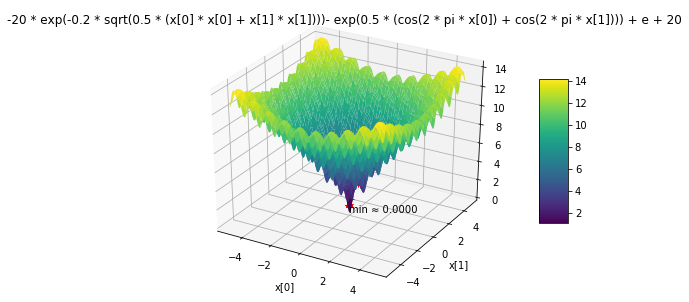

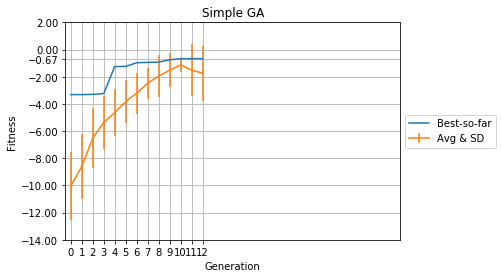

--------------------------
Generation: 13
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0], fit =    -0.6727
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0], fit =    -0.6914
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 0 0 0], fit =    -0.9386
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 0 0 0], fit =    -0.9212
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0], fit =    -0.9471
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0], fit =    -0.9446
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0], fit =    -0.9743
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit =    -0.9755
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit

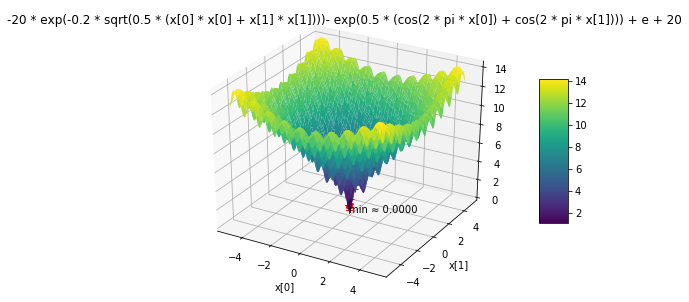

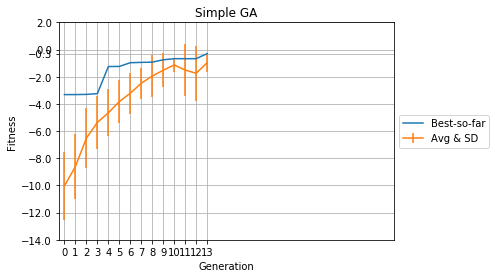

--------------------------
Generation: 14
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2999
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0
 0 0 0], fit =    -0.8596
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3140
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.5757
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -2.7368
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 1], fit =    -0.9747
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 0], fit =    -0.9396
gene = [1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0], fit

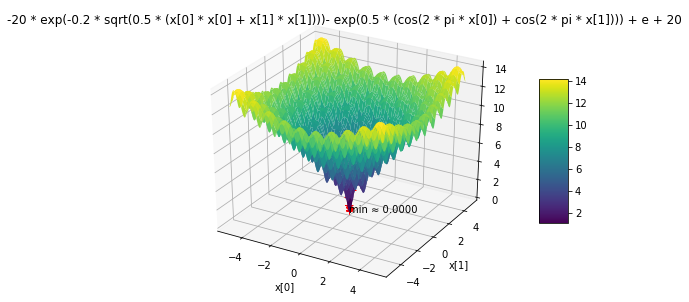

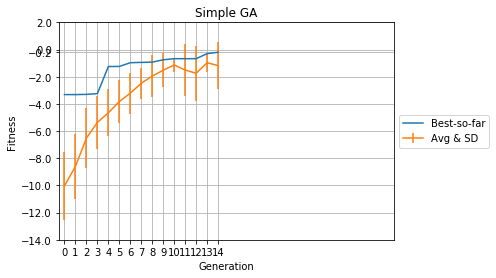

--------------------------
Generation: 15
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 0 0 0], fit =    -0.9212
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0], fit =    -4.7996
gene = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0], fit =    -0.3440
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3014
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2999
gene = [1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3222
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -2.4880
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0], fit

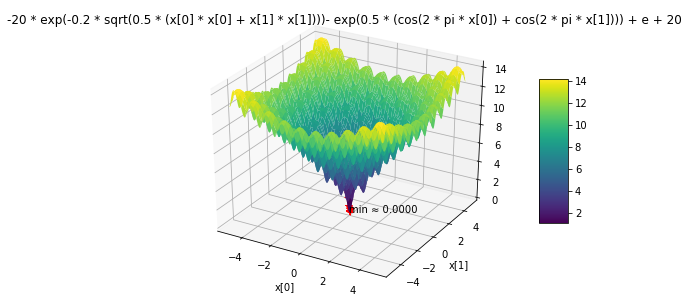

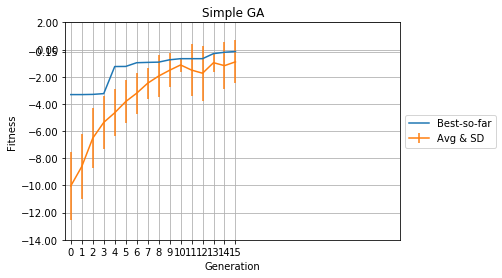

--------------------------
Generation: 16
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1469
gene = [1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2321
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2152
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3149
gene = [0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -7.2220
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3140
gene = [1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.4005
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit

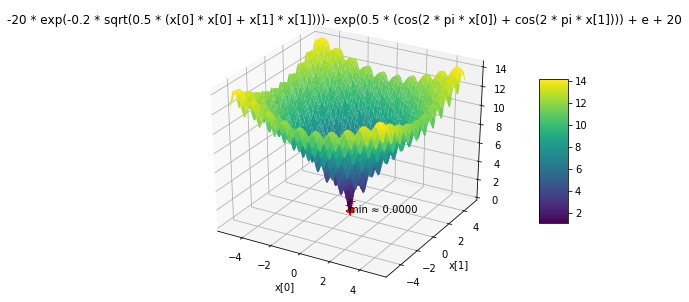

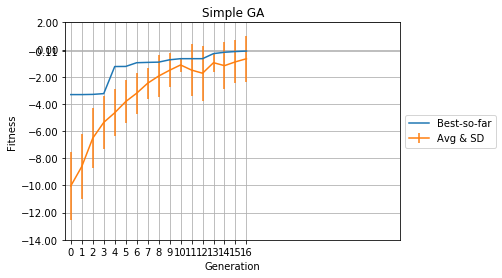

--------------------------
Generation: 17
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1123
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -7.7464
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3018
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3014
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.3105
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.2952
gene = [1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1968
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit

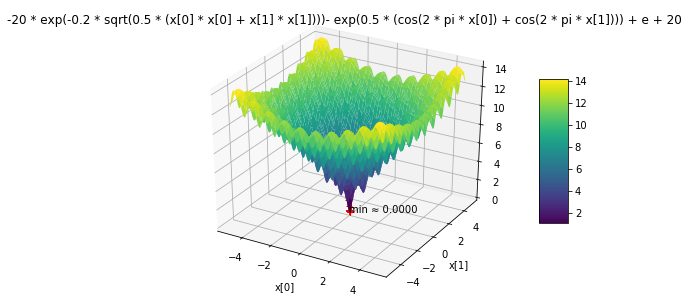

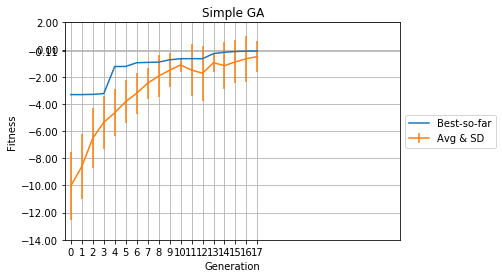

--------------------------
Generation: 18
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1123
gene = [1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.3106
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1999
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1471
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1471
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1448
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.2972
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit

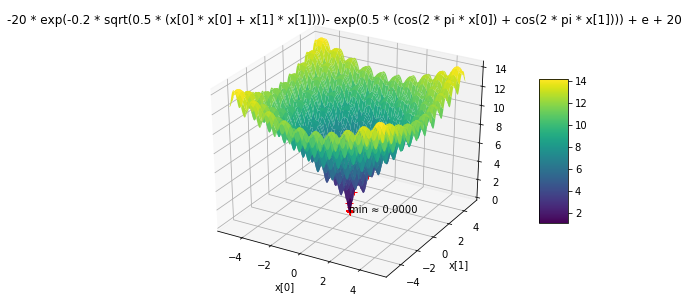

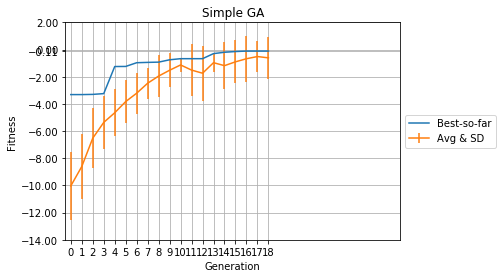

--------------------------
Generation: 19
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.1123
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 0 0], fit =    -0.1430
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2002
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2001
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1448
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1448
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0], fit =    -0.3007
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 0], fit =    -0.1406
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit

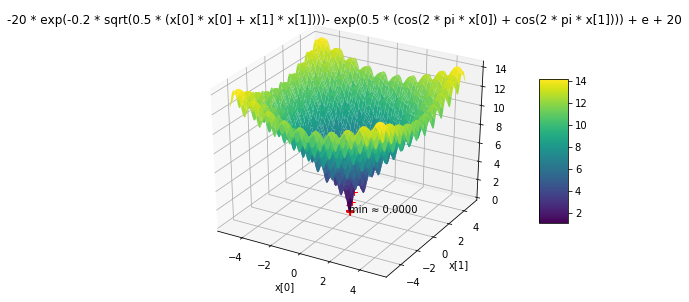

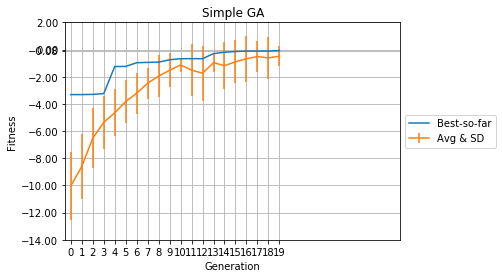

--------------------------
Generation: 20
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -0.0775
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0], fit =    -0.2177
gene = [1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0
 0 0 0], fit =    -0.1558
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1096
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1754
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0
 0 0 0], fit

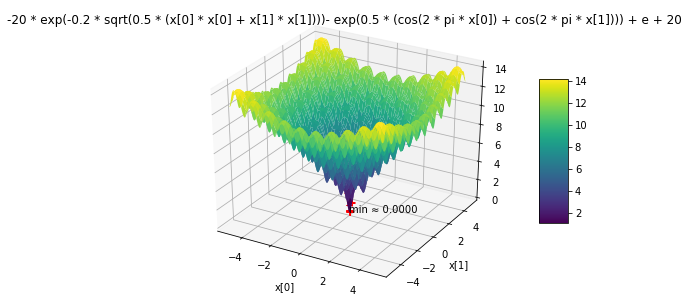

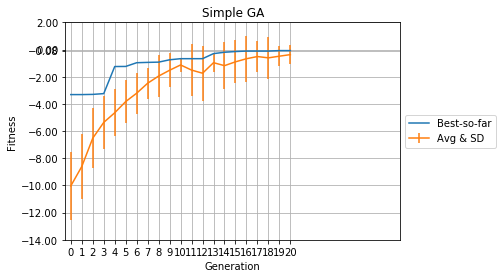

--------------------------
Generation: 21
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -0.0775
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.0778
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.1283
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1235
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1424
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1284
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0], fit

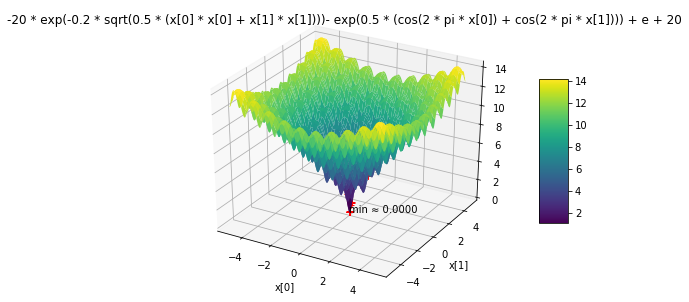

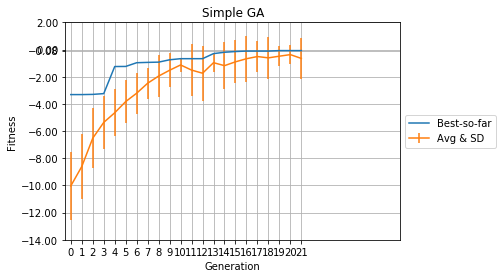

--------------------------
Generation: 22
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -0.0775
gene = [1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1671
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1262
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1235
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1235
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1438
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0], fit =    -0.1566
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0], fit =    -0.0972
gene = [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 0], fit

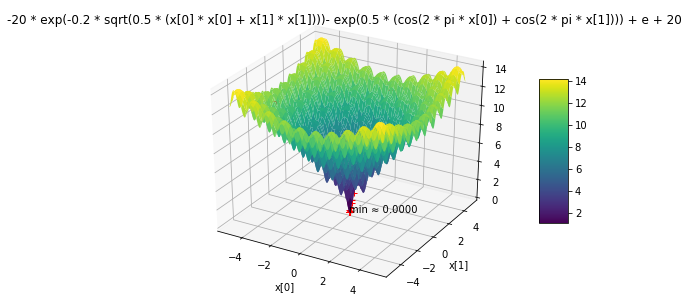

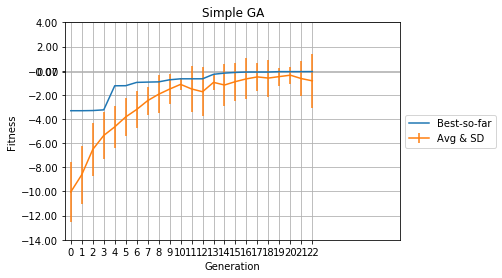

--------------------------
Generation: 23
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.0742
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1262
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -3.2572
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1096
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.1283
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.1283
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1096
gene = [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1439
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit

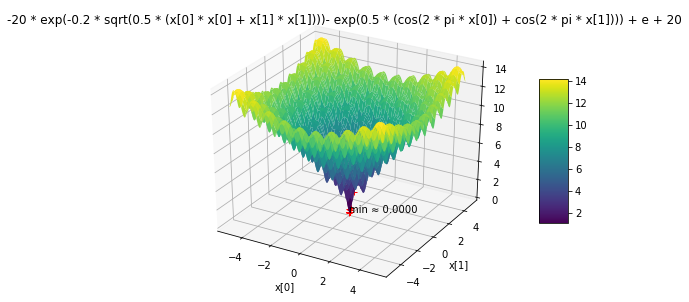

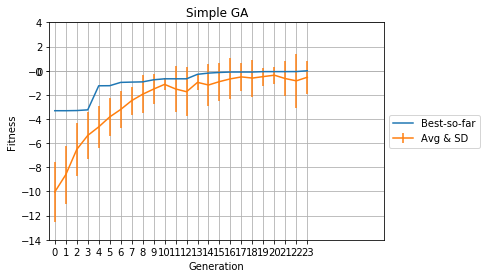

--------------------------
Generation: 24
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -0.0775
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0776
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.1283
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1257
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit =    -0.1257
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.0747
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1262
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit

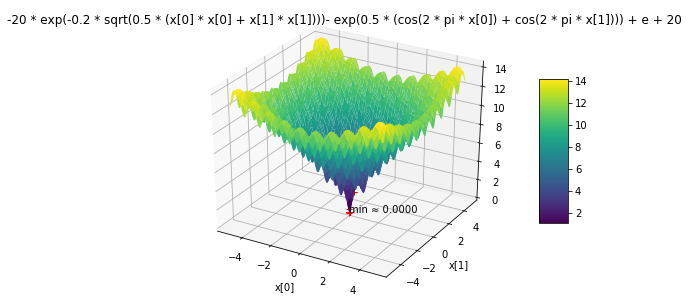

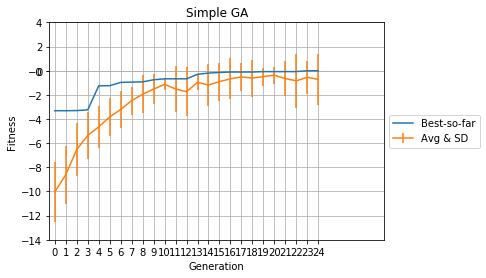

--------------------------
Generation: 25
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1072
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 0 0], fit =    -3.2482
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 0 0], fit =   -10.1220
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1
 0 0 0], fit =    -0.0939
gene = [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1262
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0741
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 1 0], fit =    -0.0782
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0], fit

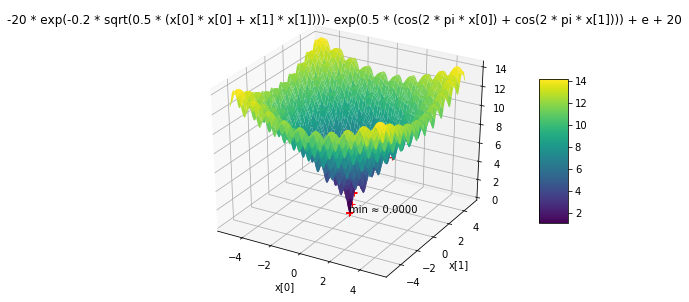

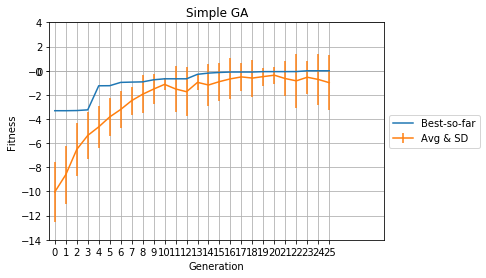

--------------------------
Generation: 26
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0], fit =    -1.0439
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1], fit =    -0.0198
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 1 0], fit =    -0.0782
gene = [1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -3.2585
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.2843
gene = [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0], fit =    -0.1072
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0], fit

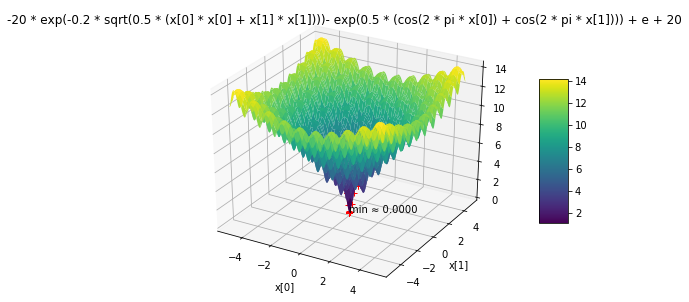

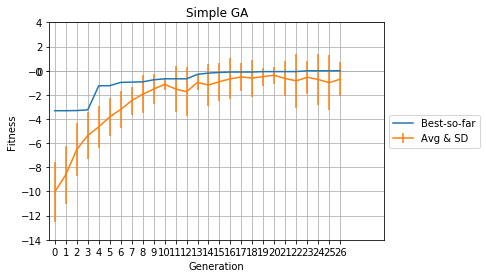

--------------------------
Generation: 27
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 0], fit =    -0.1181
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -3.2481
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1], fit =    -0.0069
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1], fit =    -0.0198
gene = [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -0.0739
gene = [1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit =    -1.0450
gene = [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 1], fit

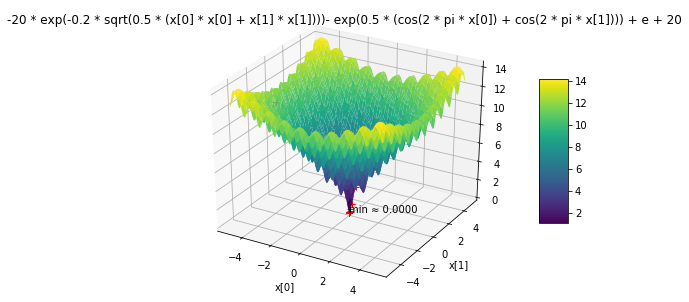

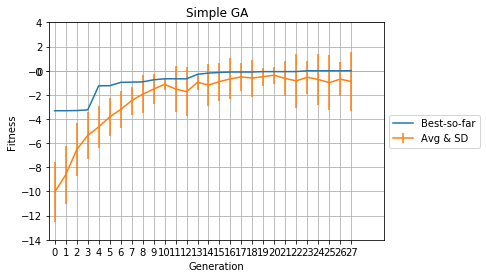

--------------------------
Generation: 28
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0], fit =    -0.0042
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0776
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0201
gene = [1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -4.3212
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0741
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 1 0], fit =    -0.0840
gene = [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 1 0], fit =    -0.0833
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 1 0], fit =    -0.0747
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 0], fit

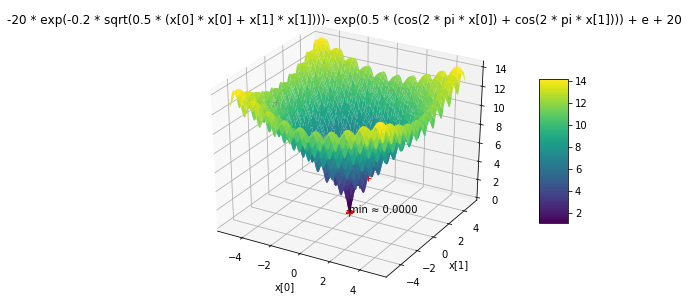

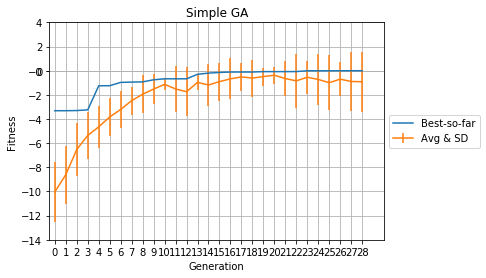

--------------------------
Generation: 29
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0], fit =    -0.0038
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0], fit =    -2.2309
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0], fit =    -0.0042
gene = [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0201
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 1], fit =    -0.0076
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0741
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0], fit =    -0.0741
gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 1], fit

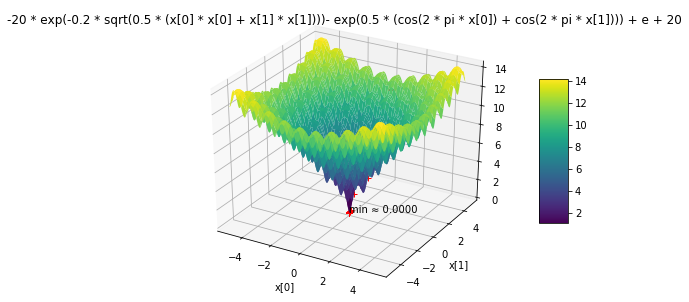

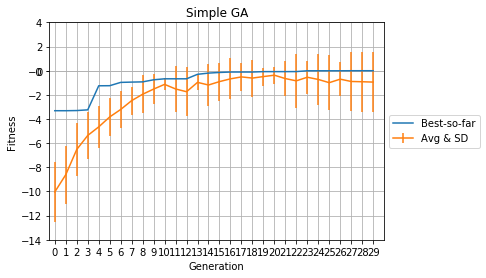


The best individual founded by GA: gene = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0], fit =    -0.0038
Solution:
x = [ 0.00129223 -0.00022411]
y = f(x) = 0.0037553416413445007


In [36]:
# Create a GA object
ga = GA(fn, params)

# Then, run GA
best_indiv = ga.run()

# Display result
print("\nThe best individual founded by GA:", best_indiv)

print("Solution:")
x = ga.evaluator.decode(best_indiv, ga.evaluator.function.domain)
print("x =", x)
y = ga.evaluator.function.evaluate(x)
print("y = f(x) =", y)

## Assignments: 
1. Implement a `RouletteWheelSelector` class which derives properties from the `Selector` class:
2. Implement a `TwoPointCrossover` class which derives properties from the `Crossover` class:
3. Test and run GA with the `RouletteWheelSelector` and `TwoPointCrossover` classes.


* Due: **12 Feb 2022 (Sat), before 9:00**
* Submit your code to via MS Teams